# MASTERCLASS of the Cosmic Piano

In this masterclass you will learn:

1) What is the muon flux
2) How to handle the data coming from the Cosmic Piano
3) How to check if the data have issues
4) How to measure the muon flux
5) How to compare it with theoretical predictions

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import functions

### Loading the dataset

We use Pandas Dataframes to save our data

In [2]:
file_path = "module_events.csv"
# Read the DataFrame from the CSV file
df_read = functions.read_dataframe_from_file(file_path)
print(df_read.head())  # Print the first few rows of the DataFrame


DataFrame read from module_events.csv
   module    timestamp
0       0  1127.004623
1       4  1127.004623
2       0  1405.000687
3       3  1405.000687
4       0  1410.007477


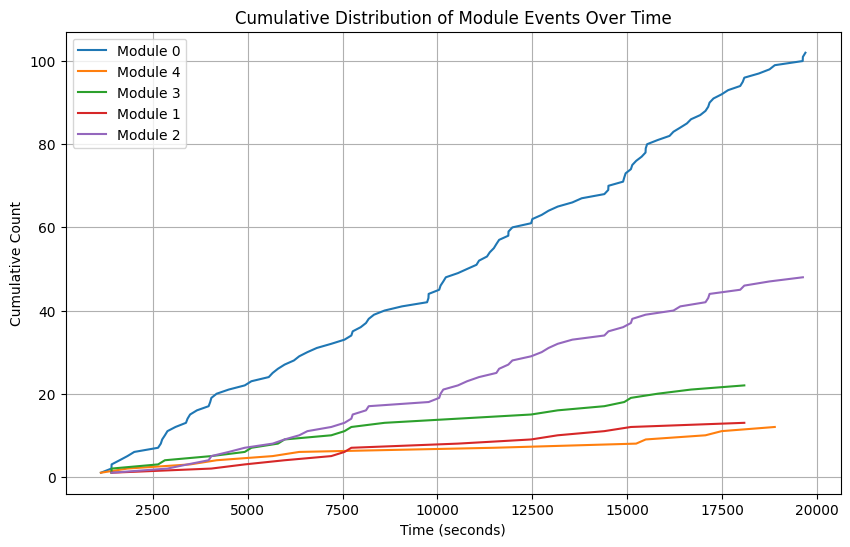

In [3]:
# Plot the cumulative distribution
functions.plot_cumulative_distribution(df_read)


### One channel is very noisy

Module 0 is especially giving lots of data. 
This can't be (they have the same area so they should have similar rates)

Let's take a different dataset where we are sure the data have similar rates

In [4]:
file_path = "module_events_similar_rates.csv"
# Read the DataFrame from the CSV file
df = functions.read_dataframe_from_file(file_path)
print(df.head())  # Print the first few rows of the DataFrame


DataFrame read from module_events_similar_rates.csv
   module  timestamp
0       0   0.953674
1       1   0.953674
2       2   0.953674
3       3   0.953674
4       4   0.953674


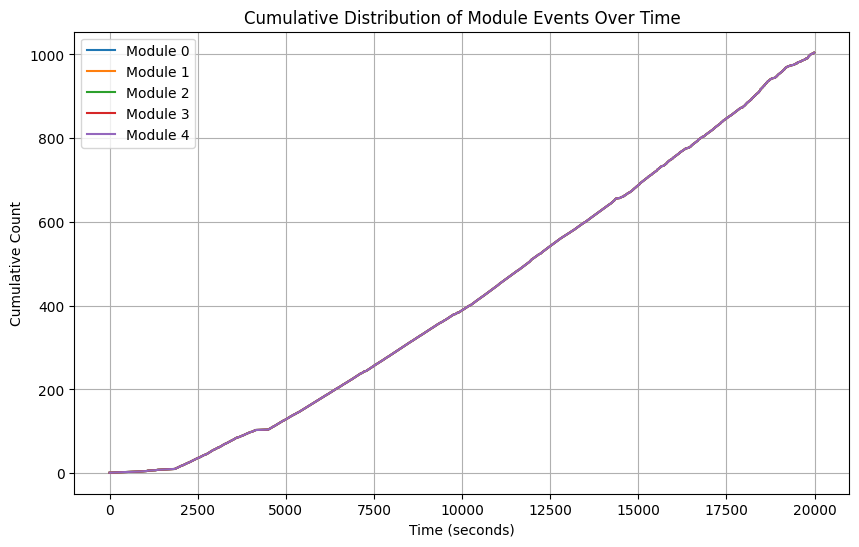

In [5]:
# Plot the cumulative distribution
functions.plot_cumulative_distribution(df)


### Very similar rates

Very similar rates! These data can be used for physics measurements
Let's start by checking now the distribution in time of the events

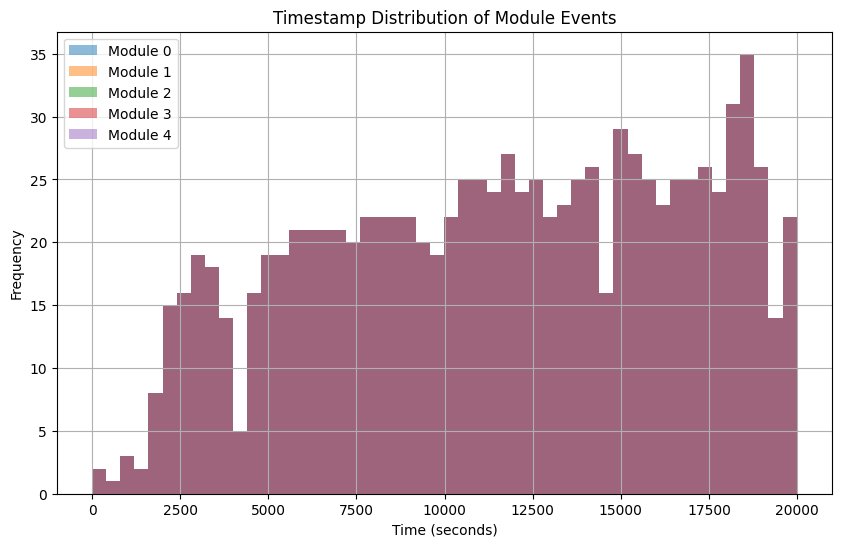

In [6]:
# Plot the timestamp distribution with a large bin size
functions.plot_timestamp_distribution(df, bin_size=50)


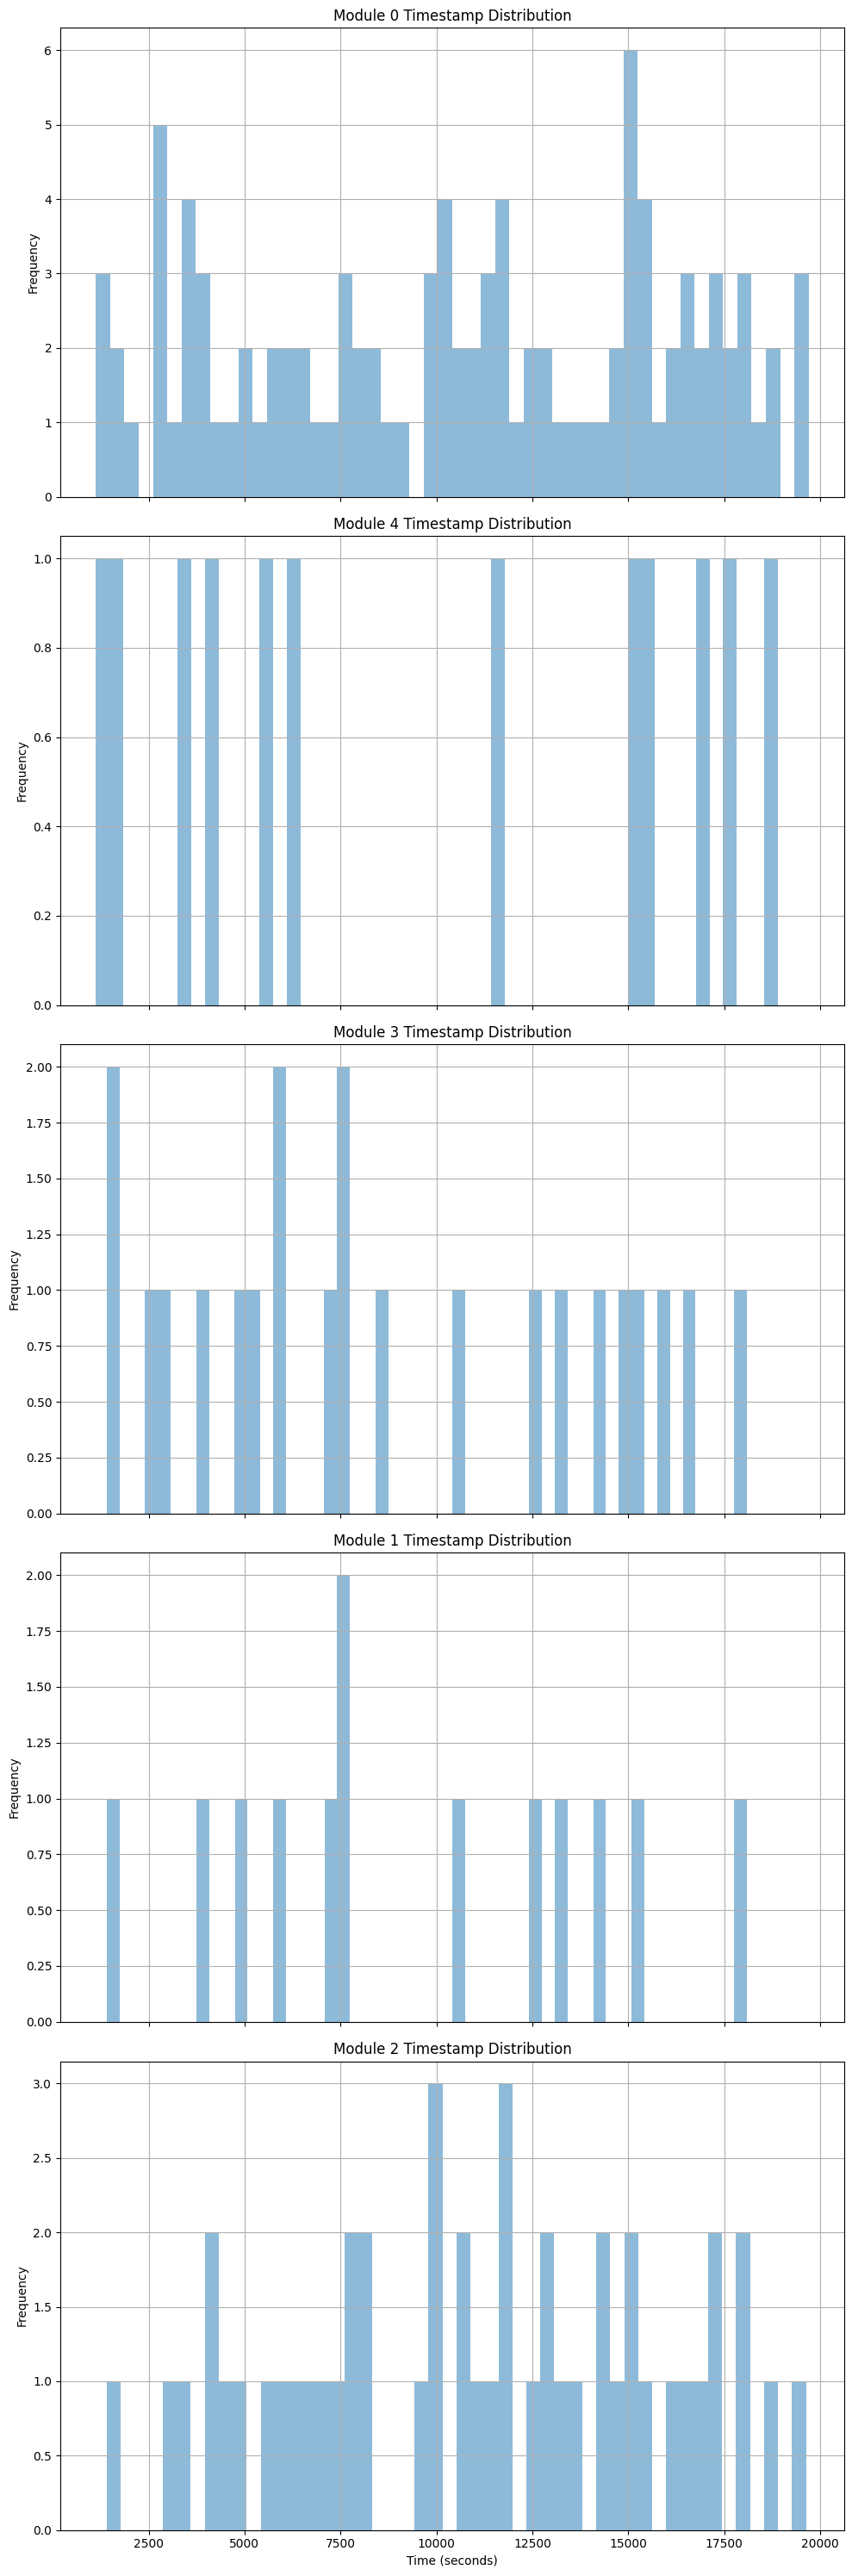

In [7]:
# Plot the timestamp distribution for each module in separate subplots
functions.plot_histograms_separate_pads(df_read, bin_size=50)

### BE CAREFUL!

A mistake was introduced in the previous cell.
The distributions look very different between each other: you have loaded the previous dataset instead!
Let's continue using the right dataset

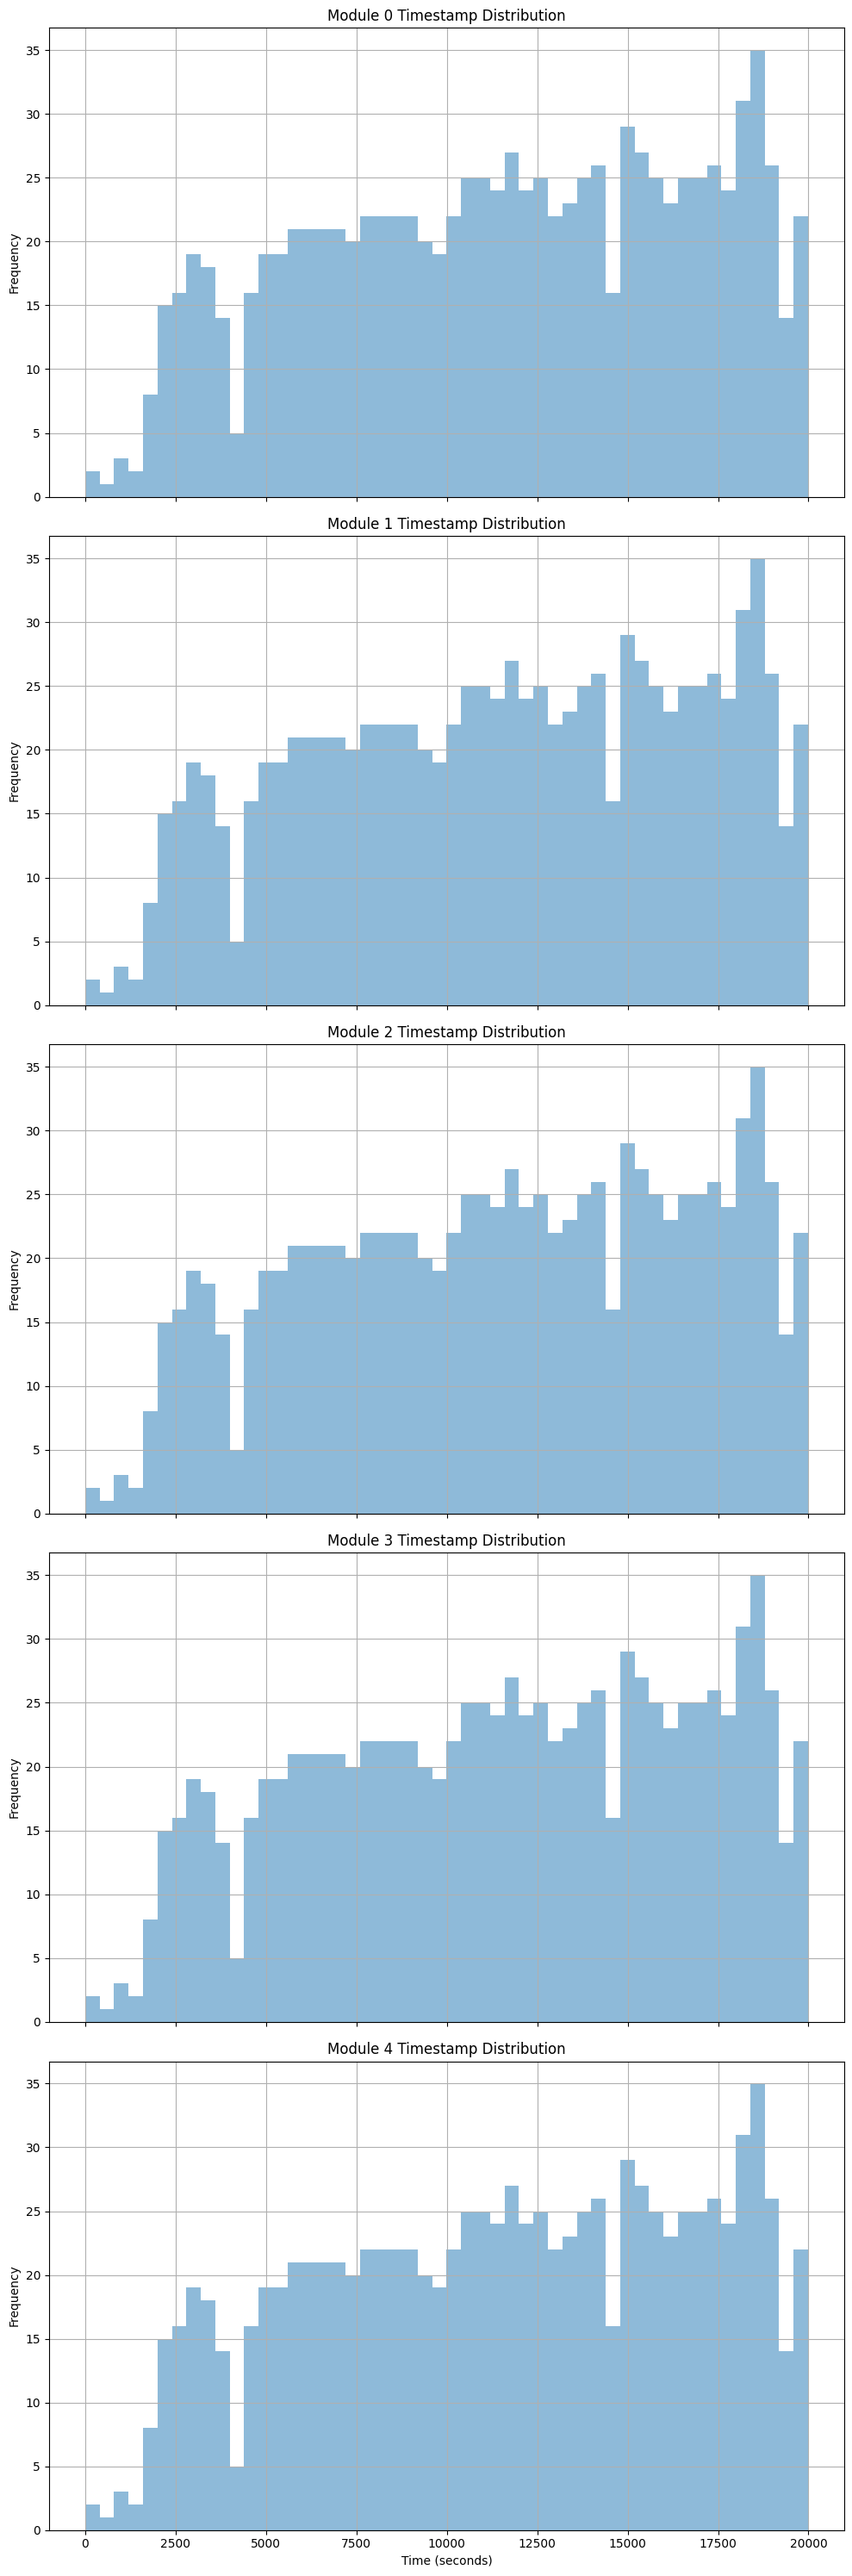

In [8]:
# Plot the timestamp distribution for each module in separate subplots
functions.plot_histograms_separate_pads(df, bin_size=50)


### The Muon Flux

An approximation of the Geissner Model

In [9]:
def dNmudEmudOmega(Emu, costheta):
    """Computes the muon flux at sea level
    Based on:
    https://www.sciencedirect.com/science/article/pii/S0969804320303389?via%3Dihub

    Parameters:
    Emu (double): energy of the muon
    costheta (double): angle of arrival

    Returns:
    double:the muon flux at sea level
        
    """

    firstAddendum  = 1./(1.+ 1.1*Emu*costheta / 115.)
    secondAddendum = 0.054/(1.+ 1.1*Emu*costheta / 850.)
    normalisation  = 0.14 * np.power(Emu, -2.7)
    return normalisation * (firstAddendum + secondAddendum) 



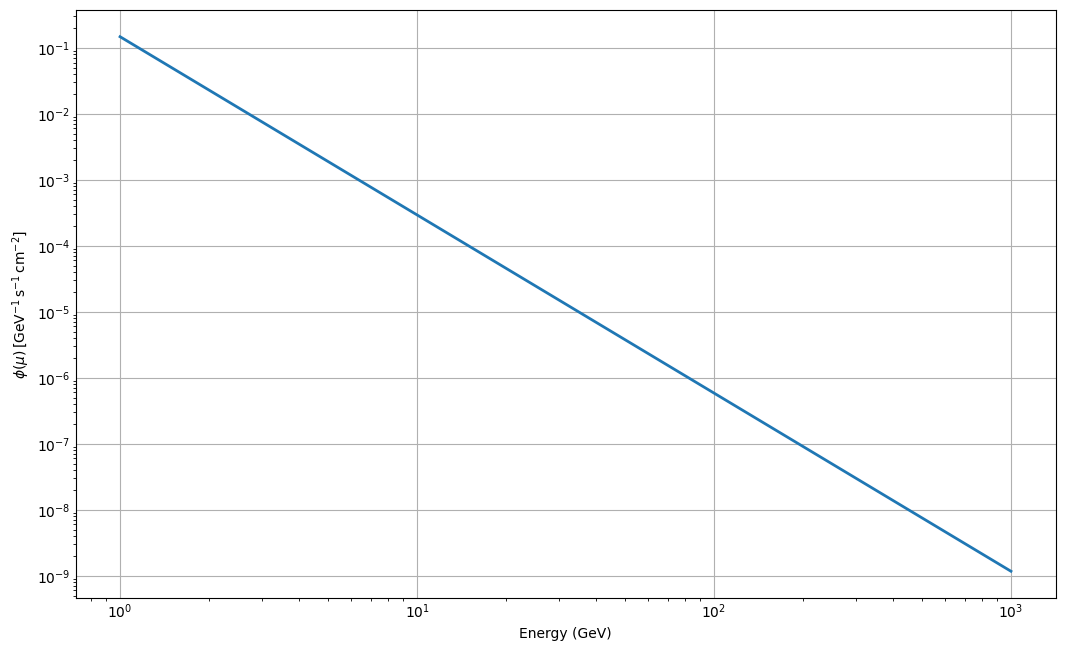

In [10]:
energy_range = (1., 1000)
num_points = 999
energy_values = np.linspace(energy_range[0], energy_range[1], num_points)
pdf_values = dNmudEmudOmega(energy_values, 0.)

plt.style.use('_mpl-gallery')

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

ax.set_yscale('log')
ax.set_xscale('log')

# Plotting the data
ax.plot(energy_values, pdf_values, linewidth=2.0)

# Setting the x-axis and y-axis labels
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$\phi(\mu) \, [\mathrm{GeV^{-1} \, s^{-1} \, cm^{-2}}]$')

plt.show()


### Our measured muon flux!

In [16]:
# Analyze the module events
# Analyze the module events
module_counts_df, total_time = functions.analyze_module_events(df)

# Convert the 'count' column to a list or a NumPy array
module_counts = module_counts_df['count'].to_numpy()  # or .tolist() if you prefer a list

print("Module Counts:")
print(module_counts)
print("\nTotal Time:", total_time)


Module Counts:
[1004 1004 1004 1004 1004]

Total Time: 19989.013671875


The measured muon flux will be then:

In [17]:
area_single_module = 14.*14. # cm2
phi = [module_count / (area_single_module*total_time) for module_count in module_counts]
phi

[np.float64(0.0002562632185698707),
 np.float64(0.0002562632185698707),
 np.float64(0.0002562632185698707),
 np.float64(0.0002562632185698707),
 np.float64(0.0002562632185698707)]

### Statistical uncertainty

The statistical uncertainty can be considered to be the square root of the number of entries on each module

In [19]:
err_phi = [np.sqrt(module_count) / (area_single_module*total_time) for module_count in module_counts]
err_phi

[np.float64(8.08759546405657e-06),
 np.float64(8.08759546405657e-06),
 np.float64(8.08759546405657e-06),
 np.float64(8.08759546405657e-06),
 np.float64(8.08759546405657e-06)]

In [21]:
from IPython.display import display, Math
# Display results in LaTeX format
for i, (phi_val, err_val) in enumerate(zip(phi, err_phi)):
    formula = r"\phi_{module \ " + f"{i}" + r"} = " + f"{phi_val:.2e} \pm {err_val:.2e}"
    display(Math(formula))


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/19/v4m73tyd09g0v7jcvl4r6jch0000gn/T/ipykernel_2163/4078073968.py:4: SyntaxWarning: invalid escape sequence '\p'
  formula = r"\phi_{module \ " + f"{i}" + r"} = " + f"{phi_val:.2e} \pm {err_val:.2e}"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>